In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from pandas._libs.hashtable import value_count
from google.colab import drive
import plotly.express as px
import plotly.graph_objs as go

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data = pd.read_csv('/content/drive/MyDrive/Database/Co2_data_ver1/Car_sales_ver_1/Car_sales.csv',index_col=0)

In [12]:
data.head()

,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,,,,,,,,,,,,,,,
Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Acura to Volvo
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                157 non-null    object 
 1   Sales_in_thousands   157 non-null    float64
 2   __year_resale_value  121 non-null    float64
 3   Vehicle_type         157 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Latest_Launch        157 non-null    object 
 14  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(3)
memory usage:

In [6]:
data.dtypes

Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [68]:
car_sales = data.dropna()

In [14]:
car_sales.isna().any()

Model                  False
Sales_in_thousands     False
__year_resale_value    False
Vehicle_type           False
Price_in_thousands     False
Engine_size            False
Horsepower             False
Wheelbase              False
Width                  False
Length                 False
Curb_weight            False
Fuel_capacity          False
Fuel_efficiency        False
Latest_Launch          False
Power_perf_factor      False
dtype: bool

In [15]:
car_sales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


In [47]:
car_sales.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


In [67]:
fig = px.scatter(car_sales,
                 x='Power_perf_factor',
                 y='Price_in_thousands',
                 color='Model',
                
                 hover_data=['Price_in_thousands'],
                 title='Price vs. Model')
fig.update_traces(marker_size=8)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
fig.show()

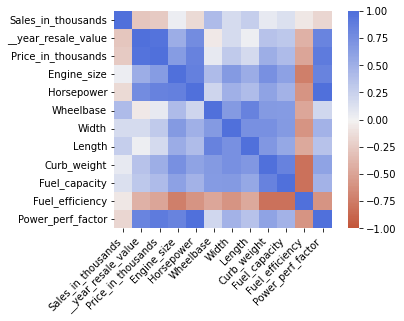

In [46]:
corr=car_sales.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 260, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x7f841fd82090> has a label of '__year_resale_value' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


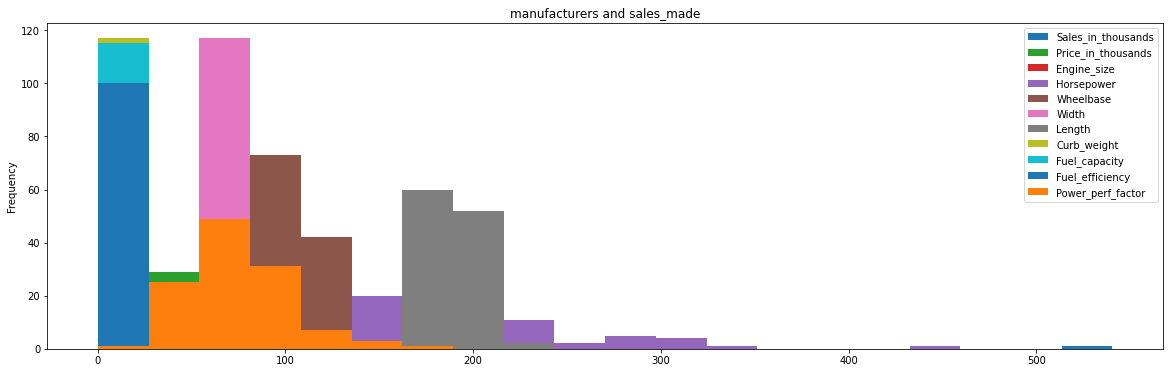

In [52]:
car_sales.plot.hist(title='manufacturers and sales_made', bins=20, xlabel='Manufacturers_name', ylabel='price_in_thousand',figsize=(20,6))

In [26]:
car_sales['Price_in_thousands'].loc['Porsche']>60

Manufacturer
Porsche    False
Porsche     True
Porsche     True
Name: Price_in_thousands, dtype: bool

In [12]:
car_sales.loc[car_sales['Price_in_thousands'] >= 20 ]

,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,,,,,,,,,,,,,,,
Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porsche,Carrera Cabrio,1.866,67.550,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,7/11/2011,135.914710
Toyota,Avalon,63.849,18.140,Passenger,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,8/31/2011,84.911898
Toyota,4Runner,68.411,19.425,Car,22.288,2.7,150.0,105.3,66.5,183.3,3.440,18.5,23.0,3/7/2011,62.355577
